# Regression Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df.shape

(1273, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [6]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [7]:
df.nunique()

Company         19
TypeName         6
Ram              9
Weight         171
Price          791
TouchScreen      2
Ips              2
Ppi             39
Cpu_brand        5
HDD              6
SSD             13
Gpu_brand        3
Os               3
dtype: int64

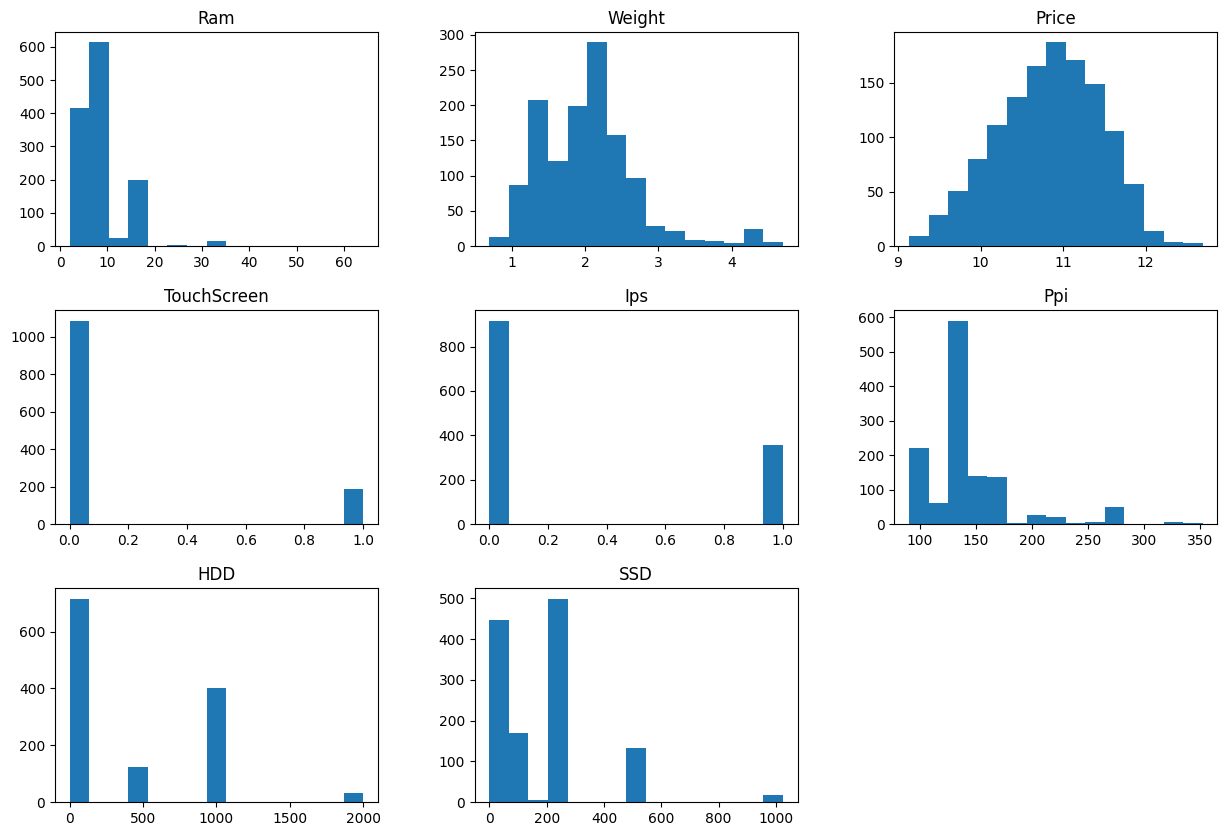

In [8]:
df.hist(figsize=(15, 10), grid=False, bins=15)
plt.show()

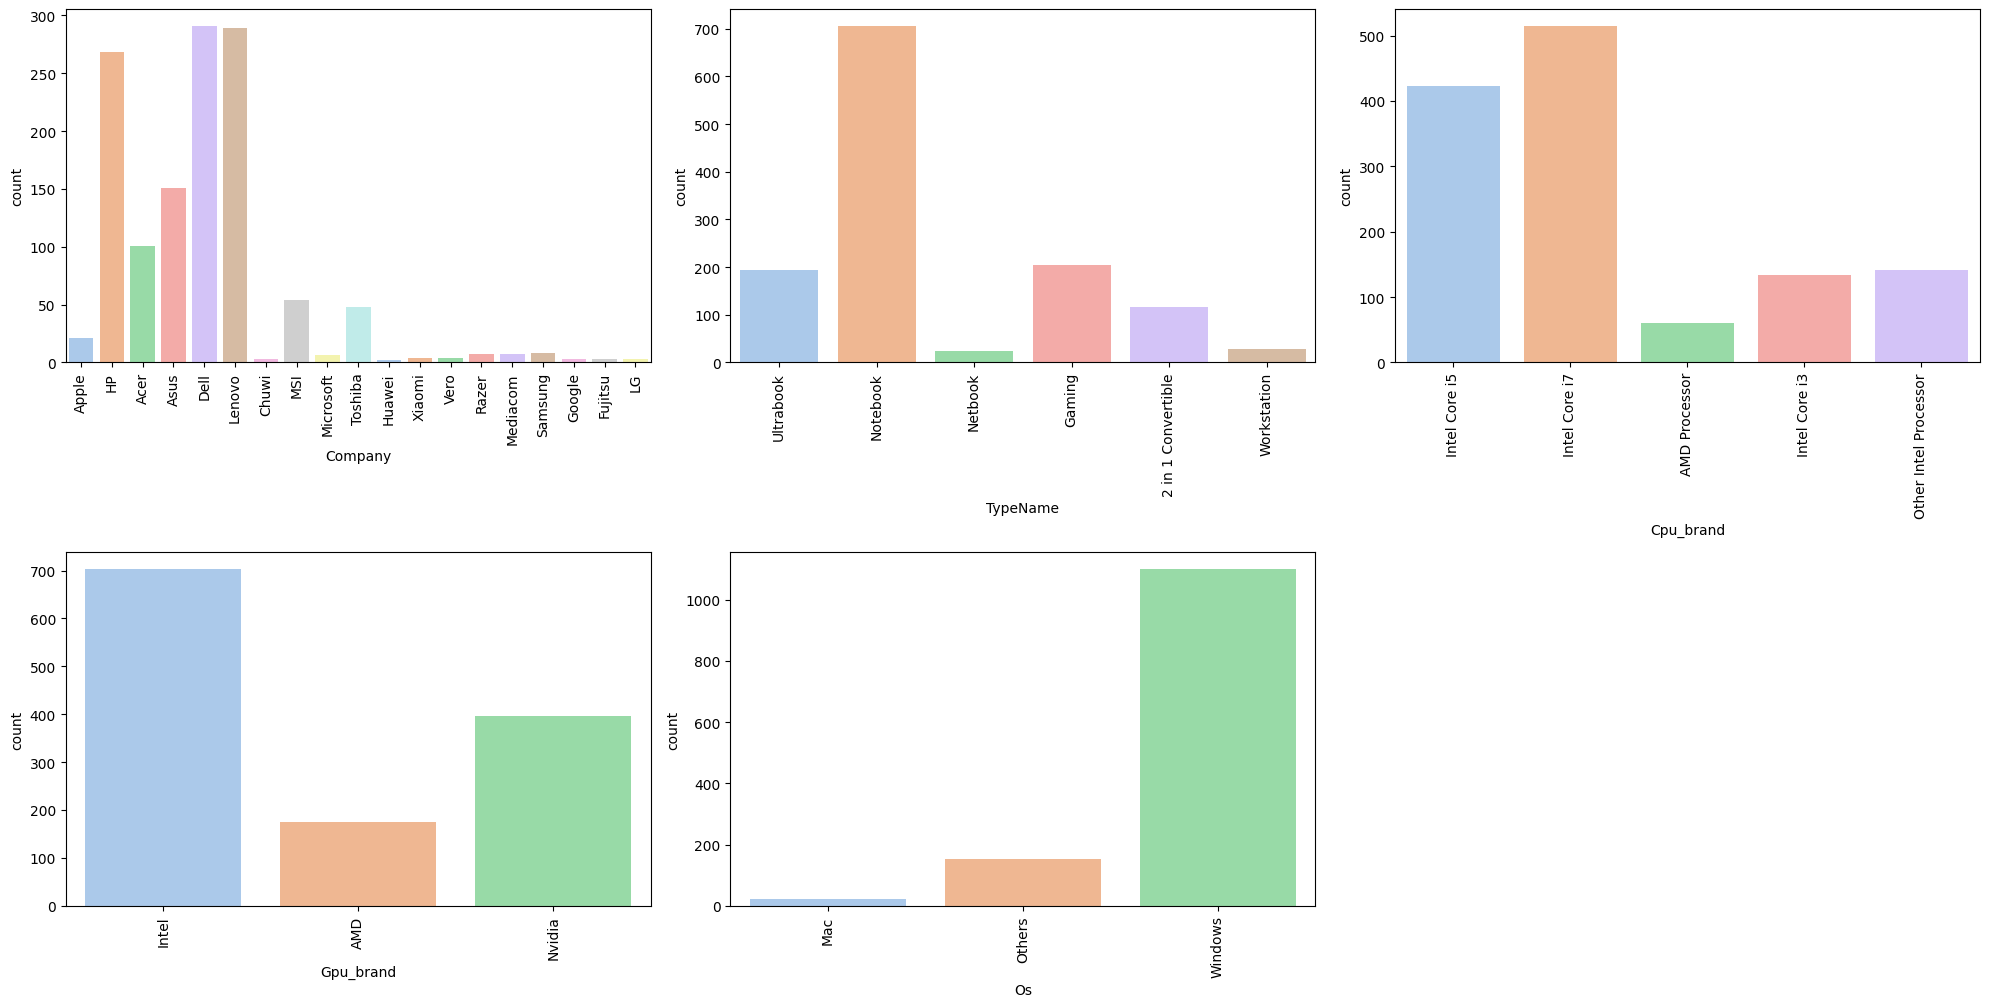

In [9]:
categories = df[['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']]

plt.figure(figsize = (20, 10))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

In [10]:
data = df.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categ = data[['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']]
for _, col in enumerate(categ.columns):
  data[col] = encoder.fit_transform(data[col])

data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop(['Price'], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(1018, 12) (255, 12) (1018,) (255,)


## TensorFlow

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [15]:
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_absolute_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

In [18]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_loss:.4f}')

8/8 [==============================] - 0s 3ms/step - loss: 0.2653
Test MSE: 0.2653


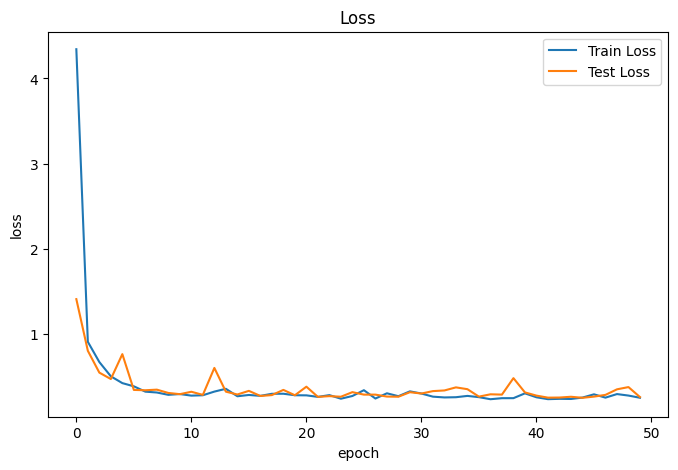

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## PyTorch

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(dtype=np.float32)).reshape(-1, 1)

In [22]:
# Создание модели
class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(input_size, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [23]:
input_size = X_train.shape[1]

model = NeuralNetwork(input_size)
model

NeuralNetwork(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [25]:
# Обучение модели
loss_values = []

for epoch in range(50):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  loss_values.append(loss.item())
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 10, Loss: 32.826393127441406
Epoch 20, Loss: 4.511019229888916
Epoch 30, Loss: 4.4271955490112305
Epoch 40, Loss: 2.084914207458496
Epoch 50, Loss: 1.25264573097229


In [26]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test MSE: {test_loss.item():.4f}')

Test MSE: 0.9050


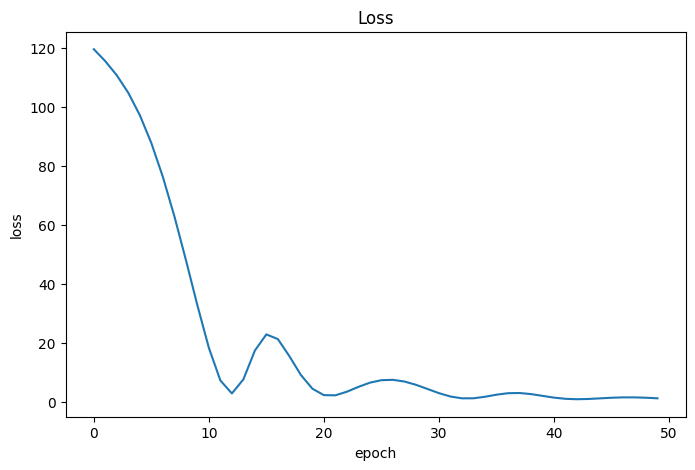

In [27]:
plt.figure(figsize=(8,5))
plt.plot(loss_values)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

У модели TensorFlow результат получился чуть лучше (MSE = 0.2653) чем у модели PyTorch (MSE = 0.9050).

# Fashion MNIST

## TensorFlow

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [29]:
# Загрузка датасета Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

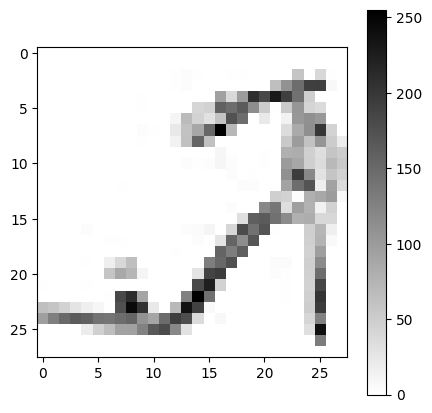

In [31]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

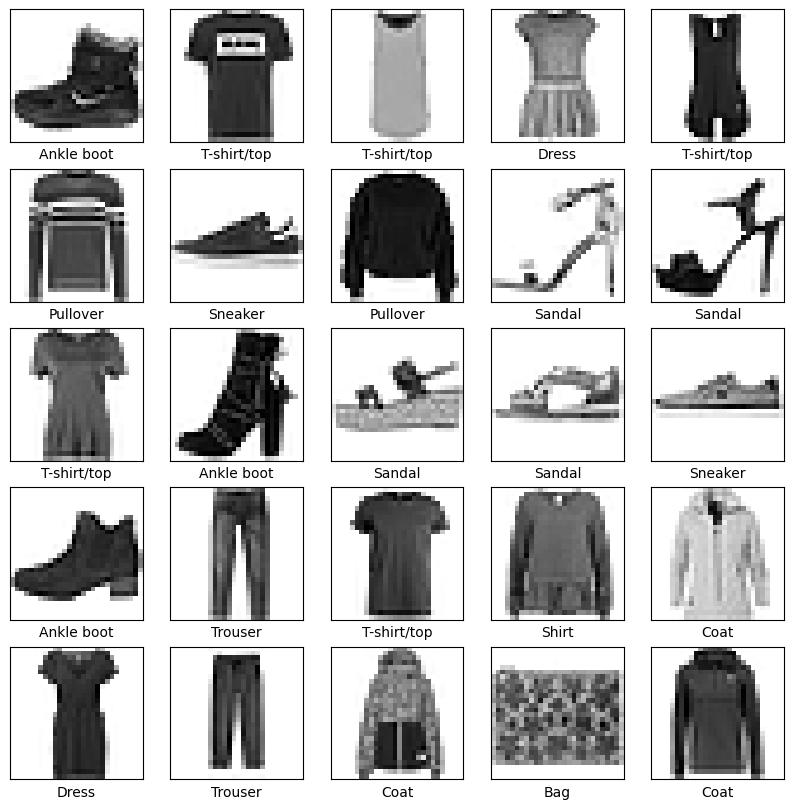

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [33]:
# Нормализация данных и преобразование меток в one-hot encoding
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255.0

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [36]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [37]:
# Очистка предыдущих логов
!rm -rf ./logs/

In [38]:
# Создание директории для логов TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=10, batch_size=128,
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback])

Epoch 1/10
469/469 [==============================] - 6s 13ms/step - loss: 0.5587 - accuracy: 0.8023 - val_loss: 0.4321 - val_accuracy: 0.8432
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3869 - accuracy: 0.8587 - val_loss: 0.4073 - val_accuracy: 0.8492
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3411 - accuracy: 0.8754 - val_loss: 0.4171 - val_accuracy: 0.8536
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3143 - accuracy: 0.8831 - val_loss: 0.3553 - val_accuracy: 0.8714
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2939 - accuracy: 0.8908 - val_loss: 0.3273 - val_accuracy: 0.8824
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2792 - accuracy: 0.8945 - val_loss: 0.3423 - val_accuracy: 0.8776
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2648 - accuracy: 0.9006 - val_loss: 0.3430 - val_accuracy: 0.8785

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accuracy of test images: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.3329 - accuracy: 0.8858
Accuracy of test images: 88.58%


In [41]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

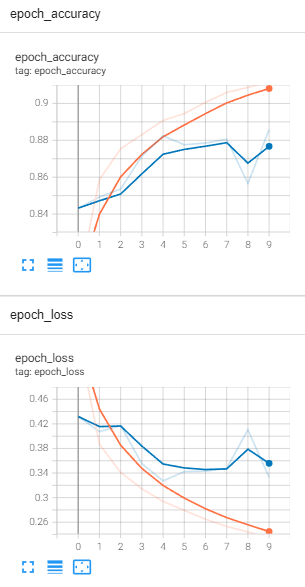

In [43]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


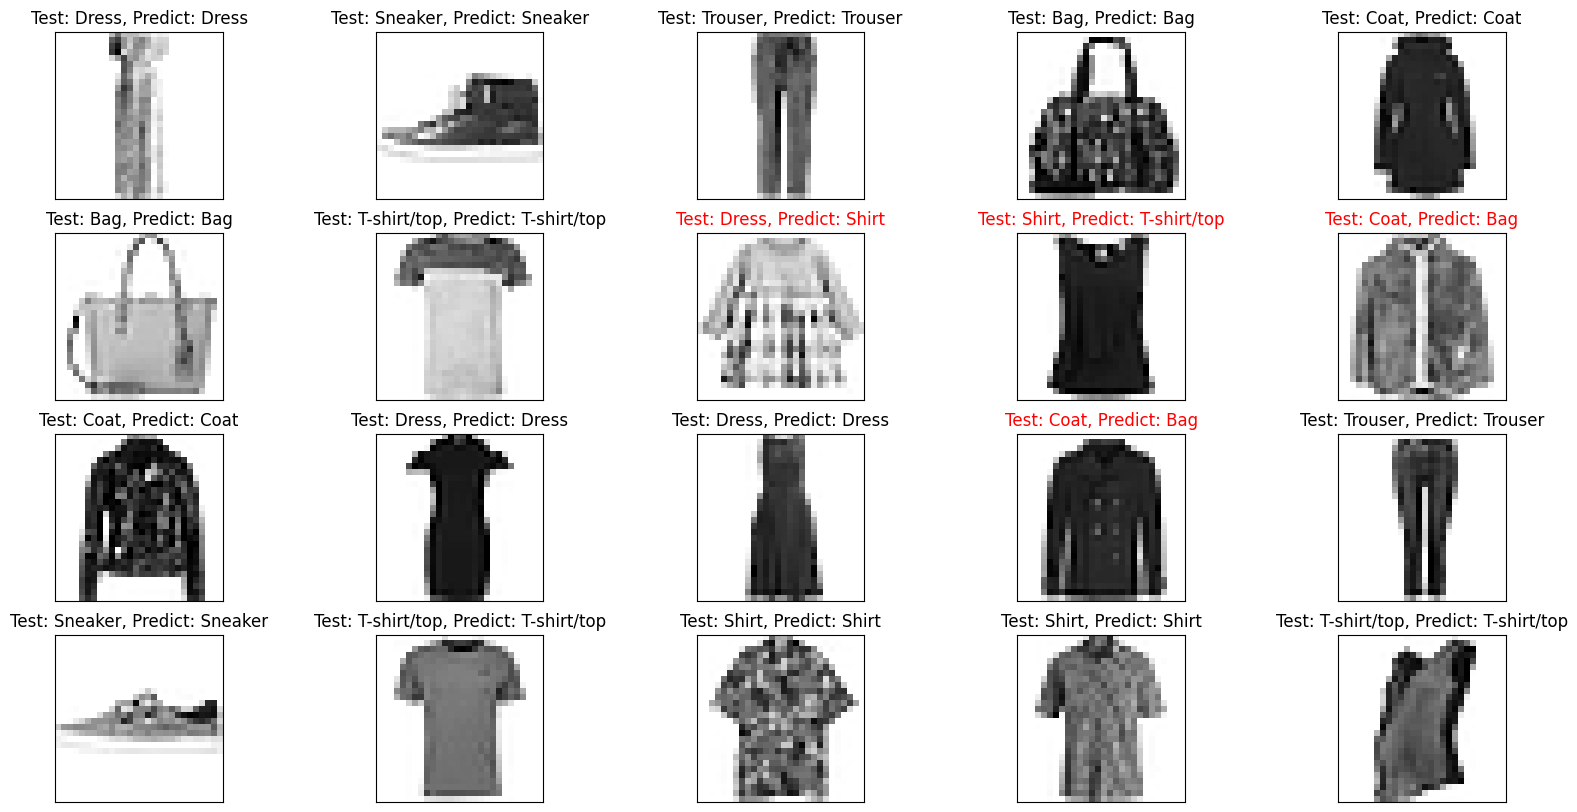

In [49]:
import random

plt.figure(figsize=(20,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  idx = random.randint(0, len(test_labels))
  predict = class_names[np.argmax(predictions[idx])]
  test = class_names[np.argmax(test_labels[idx])]
  clothes = test_images[idx]
  clothes = np.reshape(clothes, (28, 28))
  plt.imshow(clothes, cmap=plt.cm.binary)
  if test != predict:
    plt.title(f'Test: {test}, Predict: {predict}', color='red')
  plt.title(f'Test: {test}, Predict: {predict}')
plt.show()

## PyTorch

In [50]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [51]:
# Загрузка и предварительная обработка данных
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./fashion_mnist', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./fashion_mnist', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 26421880/26421880 [00:04<00:00, 5680512.80it/s] 


Extracting ./fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 152018.30it/s]


Extracting ./fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2451308.26it/s]


Extracting ./fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14668666.43it/s]


Extracting ./fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



In [52]:
# Создание модели
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 200)
    self.fc2 = nn.Linear(200, 200)
    self.fc3 = nn.Linear(200, 10)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [53]:
model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [55]:
# Обучение модели
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.31773868203163147
Epoch 2, Loss: 0.3937857747077942
Epoch 3, Loss: 0.5255619883537292
Epoch 4, Loss: 0.6535065770149231
Epoch 5, Loss: 0.2887307405471802
Epoch 6, Loss: 0.1328747421503067
Epoch 7, Loss: 0.1431887298822403
Epoch 8, Loss: 0.26199984550476074
Epoch 9, Loss: 0.2630220949649811
Epoch 10, Loss: 0.31443578004837036


In [56]:
# Оценка производительности
correct = 0
total = 0

with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy of test images: {100 * correct / total}%")

Accuracy of test images: 87.62%
